In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from src.models import *
plt.style.use('ggplot')

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import SGDClassifier, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import plot_roc_curve, confusion_matrix, classification_report

In [3]:
fake_df = pd.read_csv('data/Fake.csv')
true_df = pd.read_csv('data/True.csv')

In [4]:
fake_df['truth'] = 0
true_df['truth'] = 1
true_df['text'] = true_df['text'].apply(clean_text)
all_news_df = pd.concat([fake_df, true_df])
all_news_df['title'] = all_news_df['title'].apply(clean_titles)

In [5]:
X_train, X_test, y_train, y_test = get_X_y_splits(all_news_df, 'title')

In [6]:
baseline_clf = baseline_model(X_train, y_train)
baseline_predicted = baseline_clf.predict(X_test)

In [7]:
nb_clf = naive_bayes_model(X_train,y_train)
nb_predicted = nb_clf.predict(X_test)
nb_clf.score(X_test,y_test)

0.9089560541442611

In [8]:
sgd_clf = stochastic_gradient_descent_model(X_train,y_train)
sgd_predicted = sgd_clf.predict(X_test)
sgd_clf.score(X_test,y_test)

0.9262006304468756

In [9]:
pa_clf = passive_aggressive_model(X_train,y_train)
pa_predicted = pa_clf.predict(X_test)
pa_clf.score(X_test,y_test)

0.941961802336362

In [10]:
# rf_clf = random_forest_model(X_train,y_train)
# rf_clf_predicted = rf_clf.predict(X_test)
# rf_clf.score(X_test,y_test)

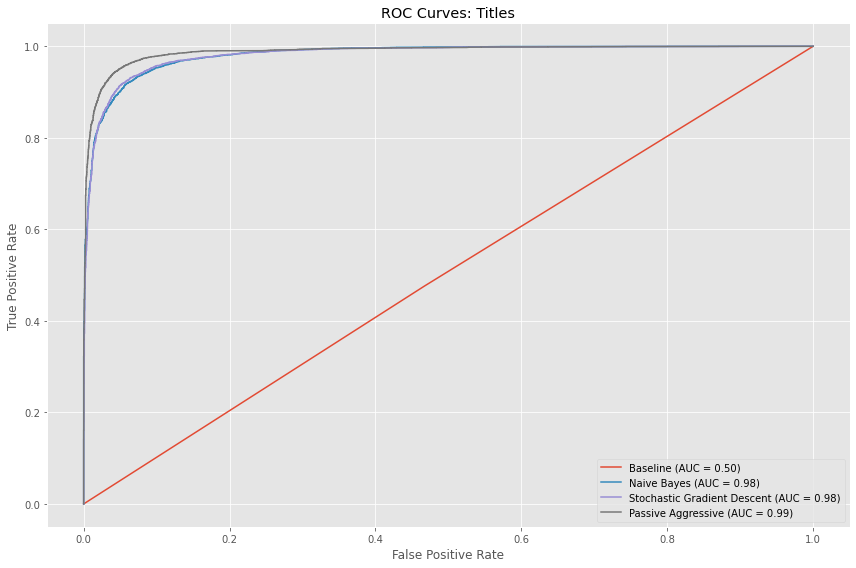

In [11]:
models = [baseline_clf, nb_clf, sgd_clf, pa_clf]
titles = ['Baseline','Naive Bayes', 'Stochastic Gradient Descent', 'Passive Aggressive']
fig, ax = plt.subplots(figsize=(12,8))
plot_all_roc_curves(X_test, y_test, models, titles, fig, ax, zoom=False, col='Titles')

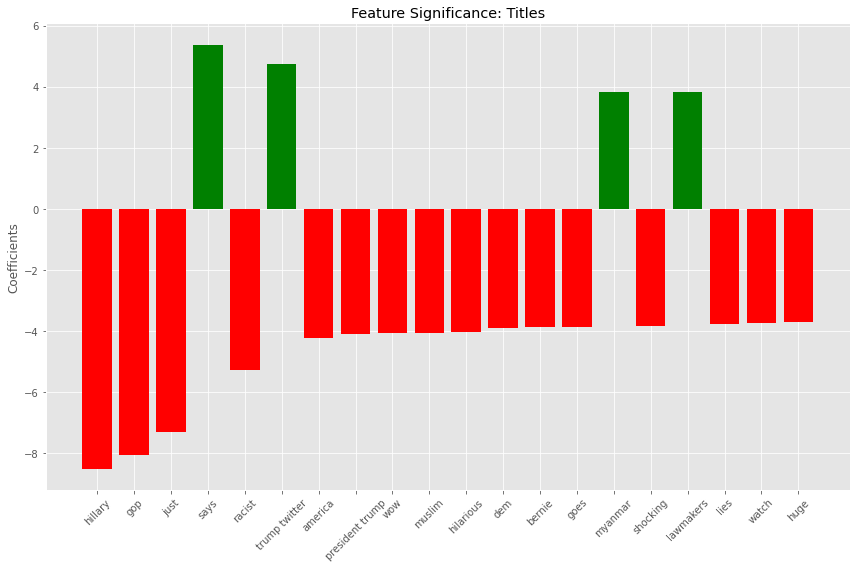

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
plot_feature_significance(pa_clf, fig, ax, col='Titles')

In [13]:
confusion_matrix(y_test, baseline_predicted)

array([[3050, 2782],
       [2817, 2576]])

In [14]:
confusion_matrix(y_test, nb_predicted)

array([[5513,  319],
       [ 491, 4902]])

In [15]:
confusion_matrix(y_test, sgd_predicted)

array([[5475,  357],
       [ 398, 4995]])

In [16]:
confusion_matrix(y_test, pa_predicted)

array([[5590,  242],
       [ 313, 5080]])

In [17]:
print(classification_report(y_test, pa_predicted, target_names=['Fake News','Real News']))

              precision    recall  f1-score   support

   Fake News       0.95      0.96      0.95      5832
   Real News       0.95      0.94      0.95      5393

    accuracy                           0.95     11225
   macro avg       0.95      0.95      0.95     11225
weighted avg       0.95      0.95      0.95     11225



In [18]:
test_title = ["Protesters ignite fury after shutting down packed Florida highway"]
pa_clf.predict(test_title)

array([0])

In [35]:
X_train_all = all_news_df[all_news_df['truth']==1]['text']

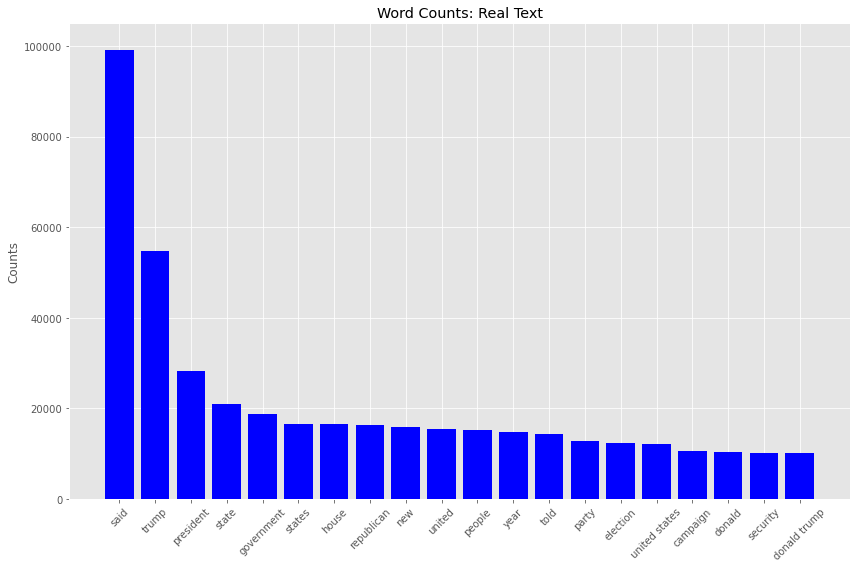

In [36]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylim(0,105000)
plot_word_counts(X_train_all, fig, ax, col='Real Text')